<a href="https://colab.research.google.com/github/alibhutto/Data-Science-Practice-Projects/blob/master/Stock%20Price%20Prediction%20using%20LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predicting stock price of Scotiabank using past 60 days stock price utilizing RNN architecture called Long Short Term Memory (LSTM)


In [4]:
#Import the Libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [6]:
#Get the stock price
df = web.DataReader('BNS', data_source='yahoo', start='2012-01-01', end='2020-06-30')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,51.290001,50.630001,50.639999,51.060001,611100.0,33.907547
2012-01-04,51.580002,50.750000,50.860001,51.279999,408800.0,34.053631
2012-01-05,50.900002,50.320000,50.900002,50.709999,464800.0,33.675125
2012-01-06,50.720001,49.820000,50.520000,50.040001,469700.0,33.230202
2012-01-09,50.500000,49.700001,50.080002,50.400002,338200.0,33.469261
...,...,...,...,...,...,...
2020-06-24,41.639999,40.750000,41.470001,40.830002,1377400.0,40.177666
2020-06-25,41.209999,40.560001,40.700001,41.099998,1102800.0,40.443348
2020-06-26,40.900002,39.639999,40.700001,39.790001,1281400.0,39.154282


In [7]:
#Get the number of rows and columns in the data set
df.shape

(2137, 6)

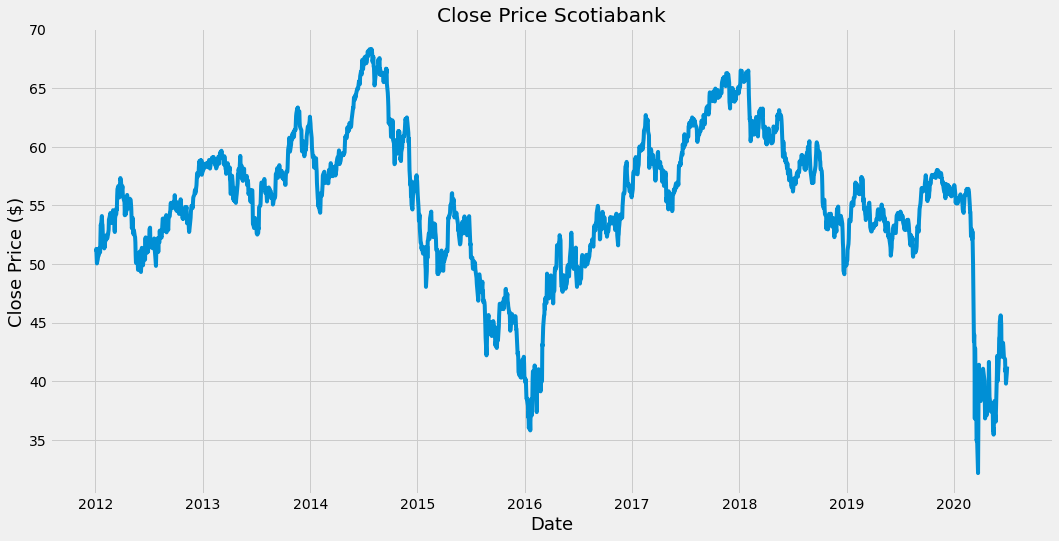

In [8]:
#Visualize the close price 
plt.figure(figsize=(16,8))
plt.title('Close Price Scotiabank')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.show()

In [9]:
#Create a new dataframe with only close column
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset= data.values
#Get tje number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

1710

In [10]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.5225325 ],
       [0.52861482],
       [0.51285591],
       ...,
       [0.21094832],
       [0.23666024],
       [0.25103681]])

In [12]:
#Creat the training data set
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 61:
    print(x_train)
    print(y_train)
    print()

[array([0.5225325 , 0.52861482, 0.51285591, 0.49433232, 0.50428534,
       0.52115005, 0.51092061, 0.52916777, 0.51755599, 0.5205972 ,
       0.55017972, 0.58556813, 0.58307987, 0.60602712, 0.58805638,
       0.5852917 , 0.56704443, 0.55792091, 0.54326791, 0.52972073,
       0.5440973 , 0.5333149 , 0.54713851, 0.54962676, 0.55598561,
       0.55930325, 0.5617915 , 0.5529444 , 0.56289741, 0.56815035,
       0.57340339, 0.59856235, 0.59939174, 0.61321535, 0.59524461,
       0.59358585, 0.58999168, 0.58943872, 0.59883878, 0.60160346,
       0.61985073, 0.61210943, 0.60575058, 0.57423277, 0.56842688,
       0.60105061, 0.60630354, 0.61072709, 0.6245507 , 0.62095653,
       0.65302731, 0.6696157 , 0.67680393, 0.66491562, 0.65938615,
       0.64970967, 0.66463919, 0.69560405, 0.69090407, 0.6892452 ])]
[0.6779098455358815]

[array([0.5225325 , 0.52861482, 0.51285591, 0.49433232, 0.50428534,
       0.52115005, 0.51092061, 0.52916777, 0.51755599, 0.5205972 ,
       0.55017972, 0.58556813, 0.583

In [13]:
#Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [15]:
#Reshape the data since LSTM expects 3 dimensional i.e. samples, timestamps & features whereas our data currently contains 2 dimensions i.e. rows and columns
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1650, 60, 1)

In [17]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [22]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [23]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1650/1650 [==============================] - 39s 24ms/step - loss: 0.0022


In [24]:
#Create the testing data set
#Create a new array containing scaled values from index  1650 to 2137
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range (60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])
  

In [25]:
#Convert the data to a numpy array
x_test = np.array(x_test)

In [27]:
#Reshape the data for LSTM
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [29]:
#Get the models perdicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [30]:
#Get root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.08124768259374543

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


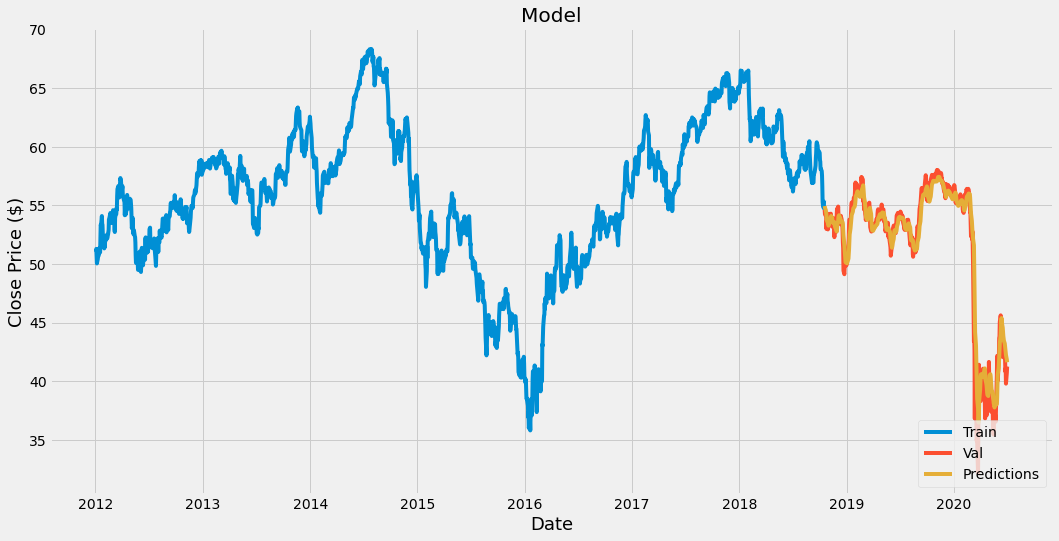

In [31]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [32]:
#Show the valid and predicted price
valid

,Close,Predictions
Date,,
2018-10-18,54.610001,54.934429
2018-10-19,54.230000,54.782070
2018-10-22,54.090000,54.572758
2018-10-23,54.040001,54.360424
2018-10-24,52.980000,54.182549
...,...,...
2020-06-24,40.830002,42.781898
2020-06-25,41.099998,42.480099
2020-06-26,39.790001,42.231842


In [33]:
#Get the stock price
bns_close = web.DataReader('BNS', data_source='yahoo', start='2012-01-01', end='2020-06-30')
#Create a new data frame
new_df = bns_close.filter(['Close'])
#Get the last 60 days closing price and convert the data frame to a numpy array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the past 60 days 
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
# Reverse the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[41.580807]]


In [34]:
#Get the actual stock price for the next day
bns_close_actual = web.DataReader('BNS', data_source='yahoo', start='2020-07-01', end='2020-07-01')
print(bns_close_actual['Close'])

Date
2020-07-01    40.759998
Name: Close, dtype: float64
